<a href="https://colab.research.google.com/github/santhiravuri/generative-ai-internship/blob/main/day6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

#normalise and reshape

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')


In [ ]:
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 286ms/step - loss: 0.2463 - val_loss: 0.1168
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 285ms/step - loss: 0.1157 - val_loss: 0.1083
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 132s 282ms/step - loss: 0.1086 - val_loss: 0.1049
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 146s 290ms/step - loss: 0.1057 - val_loss: 0.1039
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 136s 278ms/step - loss: 0.1035 - val_loss: 0.1012
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 280ms/step - loss: 0.1019 - val_loss: 0.1002
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 129s 275ms/step - loss: 0.1008 - val_loss: 0.0990
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 287ms/step - loss: 0.0996 - val_loss: 0.0983
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 137s 275ms/step - loss: 0.0989 - val_loss: 0.0977
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 284ms/step - loss: 0.0984 - val_loss: 0.0978


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


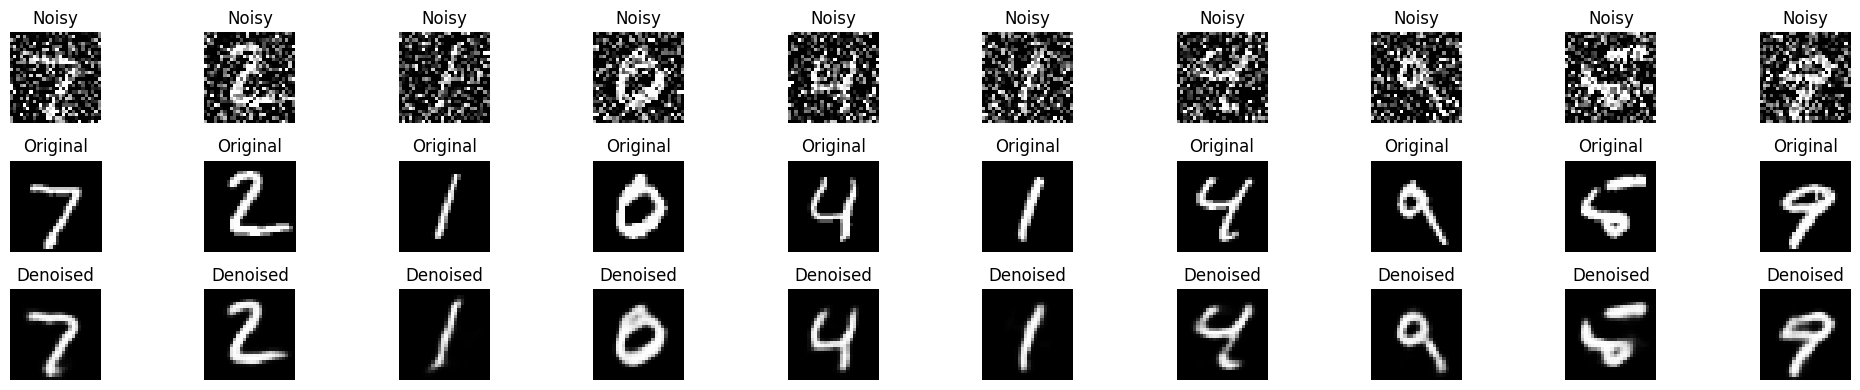

In [ ]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # original
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
plt.tight_layout()
plt.show()
